<a href="https://colab.research.google.com/github/uzairazmat/Data-Science-Internship-with-British-Airways/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [48]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [49]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [51]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [52]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [53]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## Handling missing values

In [55]:
df.isnull().sum() #check if our data having null values

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


#Data Formating

In [56]:
df["sales_channel"].value_counts() # May be I use this feature inone hot vector presentation

,count
sales_channel,
Internet,44382
Mobile,5618


In [57]:
df.corr(numeric_only=True)["booking_complete"]

# FLight duration has negative impact
# Wants Extra Service slightly influence

,booking_complete
num_passengers,0.024116
purchase_lead,-0.022131
length_of_stay,-0.042408
flight_hour,0.007127
flight_day,-0.006986
wants_extra_baggage,0.068139
wants_preferred_seat,0.050116
wants_in_flight_meals,0.026511
flight_duration,-0.106266
booking_complete,1.000000


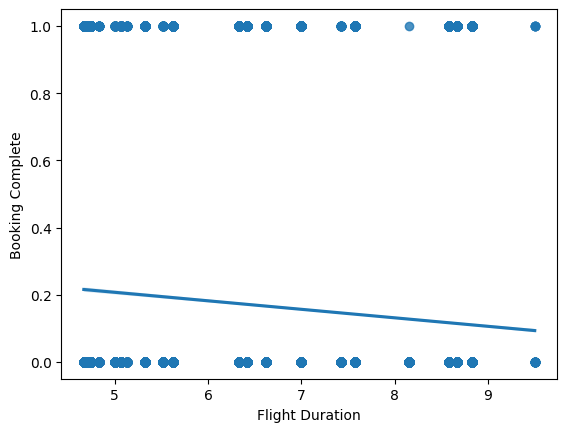

In [58]:
sns.regplot(x="flight_duration", y="booking_complete", data=df)
plt.xlabel("Flight Duration")
plt.ylabel("Booking Complete")
plt.show()  #clearly scene negative relation

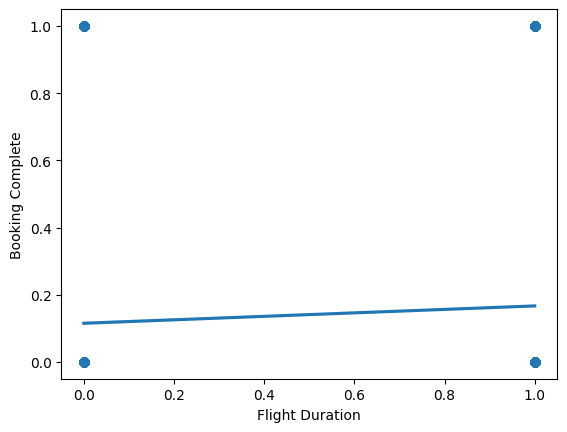

In [59]:
sns.regplot(x="wants_extra_baggage", y="booking_complete", data=df)
plt.xlabel("Flight Duration")
plt.ylabel("Booking Complete")
plt.show()  # it's shows slightly positive at that time i kept this feature

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

# Check Corelation of booking_complete  with object data types features

In [61]:
col = ["sales_channel","trip_type","flight_day","route","booking_origin"]
mean_of_obj_col = {}
for c in col:
  mean_c = df.groupby(df[c])["booking_complete"].mean()
  mean_of_obj_col[c] = mean_c

print(mean_of_obj_col)



{'sales_channel': sales_channel
Internet    0.154770
Mobile      0.108402
Name: booking_complete, dtype: float64, 'trip_type': trip_type
CircleTrip    0.043103
OneWay        0.051680
RoundTrip     0.150575
Name: booking_complete, dtype: float64, 'flight_day': flight_day
1    0.148605
2    0.147139
3    0.163148
4    0.151131
5    0.145393
6    0.148142
7    0.141440
Name: booking_complete, dtype: float64, 'route': route
AKLDEL    0.000000
AKLHGH    0.000000
AKLHND    0.000000
AKLICN    0.000000
AKLKIX    0.000000
            ...   
TRZWUH    0.000000
TRZXIY    0.000000
TWUWUH    0.500000
TWUXIY    0.285714
URTXIY    0.000000
Name: booking_complete, Length: 799, dtype: float64, 'booking_origin': booking_origin
(not set)               0.166667
Afghanistan             0.000000
Algeria                 0.000000
Argentina               0.000000
Australia               0.050358
                          ...   
United Arab Emirates    0.071429
United Kingdom          0.121387
United States    

In [62]:
df.groupby(df["sales_channel"])["booking_complete"].mean()

,booking_complete
sales_channel,
Internet,0.154770
Mobile,0.108402


In [63]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical features
cat_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

# Store results here
chi2_results = {}

# Loop through each categorical column
for col in cat_cols:
    contingency = pd.crosstab(df[col], df['booking_complete'])
    chi2, p, dof, expected = chi2_contingency(contingency)

    chi2_results[col] = {
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Significant': p < 0.05
    }

# Show results
chi2_results


{'sales_channel': {'Chi2 Statistic': np.float64(83.93114914857576),
  'p-value': np.float64(5.1230944214045184e-20),
  'Significant': np.True_},
 'trip_type': {'Chi2 Statistic': np.float64(39.88685806860332),
  'p-value': np.float64(2.181116284042331e-09),
  'Significant': np.True_},
 'flight_day': {'Chi2 Statistic': np.float64(16.108133180759424),
  'p-value': np.float64(0.013185192051000815),
  'Significant': np.True_},
 'route': {'Chi2 Statistic': np.float64(5907.13518148551),
  'p-value': np.float64(0.0),
  'Significant': np.True_},
 'booking_origin': {'Chi2 Statistic': np.float64(4677.602101395132),
  'p-value': np.float64(0.0),
  'Significant': np.True_}}

# Visulization

<Axes: xlabel='booking_complete', ylabel='flight_duration'>

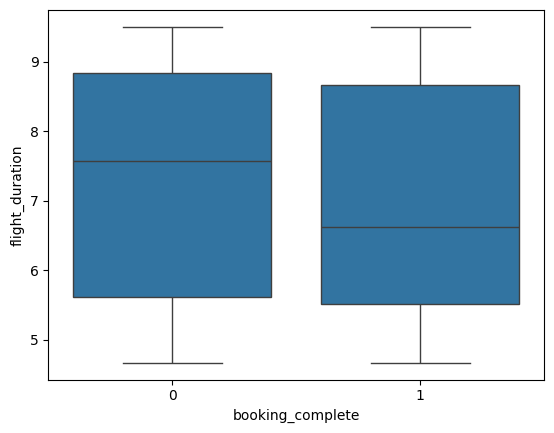

In [64]:
sns.boxplot(x="booking_complete", y="flight_duration", data=df)

<Axes: xlabel='booking_complete', ylabel='flight_day'>

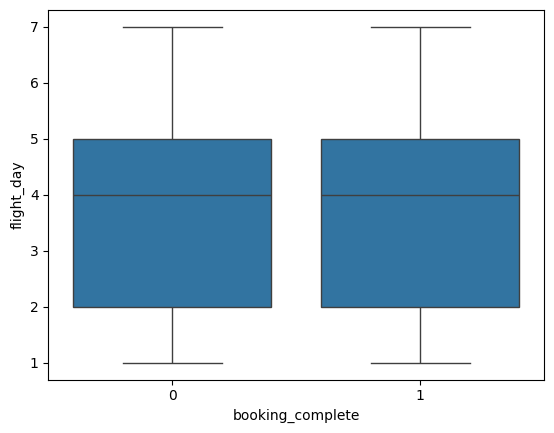

In [65]:
sns.boxplot(x=df["booking_complete"] , y=df["flight_day"] , data=df)

<Axes: xlabel='booking_complete', ylabel='flight_duration'>

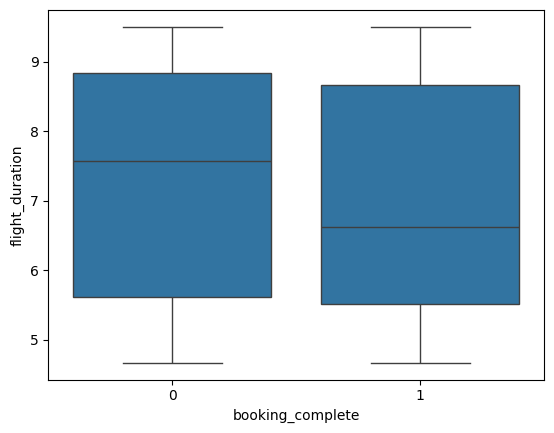

In [66]:
sns.boxplot(x=df["booking_complete"] , y=df["flight_duration"] , data=df)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

<Axes: xlabel='booking_complete', ylabel='count'>

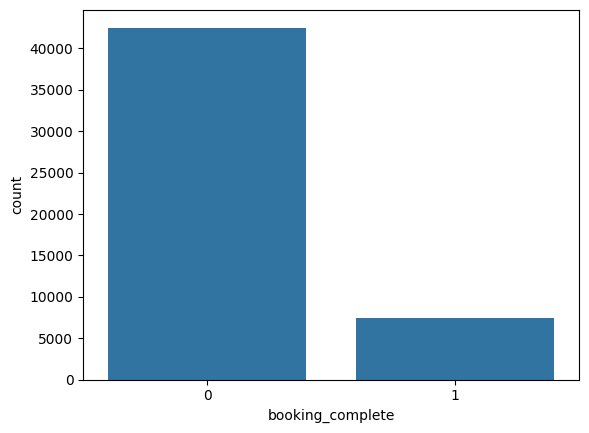

In [68]:
sns.countplot(x="booking_complete", data=df)

<Axes: xlabel='booking_complete', ylabel='count'>

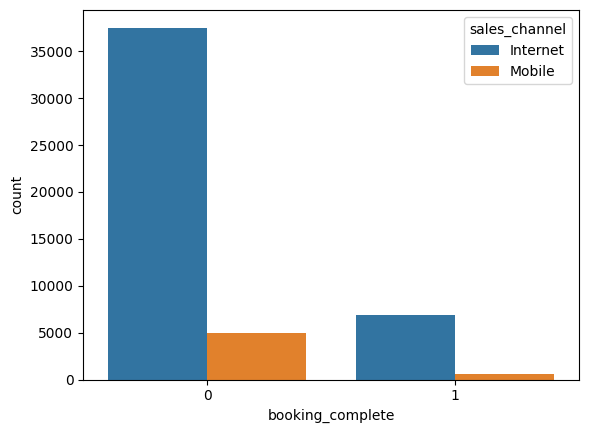

In [69]:
sns.countplot(x="booking_complete", hue="sales_channel", data=df)

<Axes: xlabel='trip_type', ylabel='count'>

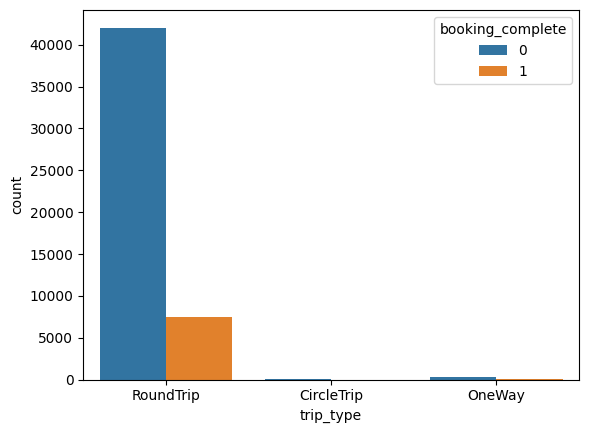

In [70]:
sns.countplot(x="trip_type", hue="booking_complete", data=df)

<Axes: xlabel='flight_day', ylabel='count'>

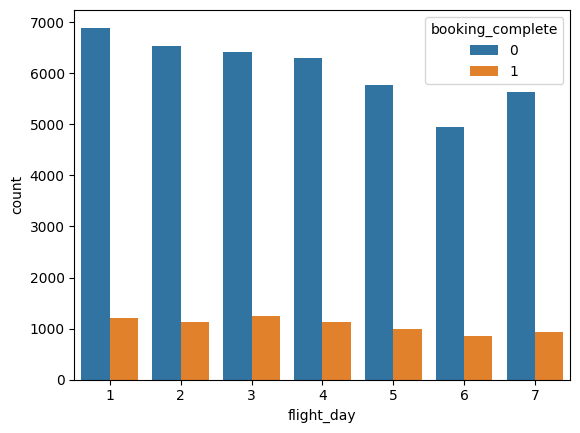

In [71]:
sns.countplot(x="flight_day", hue="booking_complete", data=df)

# Picking most infuenced features

##Categorical Features

1. sales_channel

2. Trip_type

3. flight_day

4. route (cleaned)

5. booking_origin (cleaned)


## Numerical Features

1. num_passengers

2. flight_duration

3. purchase_lead

4. length_of_stay


## Addons

1. wants_extra_baggage

2. wants_preferred_seat

3. wants_in_flight_meals




In [72]:
df["sales_channel"].value_counts()  # we use this by converting in one hot vector representaion

,count
sales_channel,
Internet,44382
Mobile,5618


In [73]:
df["trip_type"].value_counts() # we use this by converting in one hot vector representaion

,count
trip_type,
RoundTrip,49497
OneWay,387
CircleTrip,116


In [74]:
top_routes = df["route"].value_counts().nlargest(10).index
# flitering routes
df["route"] = df["route"].apply(lambda x : x if x in top_routes else "other")
df["route"].value_counts()

,count
route,
other,40665
AKLKUL,2680
PENTPE,924
MELSGN,842
ICNSIN,801
DMKKIX,744
ICNSYD,695
DMKPER,679
DPSICN,666


In [75]:
top_origin = df["booking_origin"].value_counts().nlargest(10).index
df["booking_origin"] = df["booking_origin"].apply(lambda x : x if x in top_origin else "other")
df["booking_origin"].value_counts()

,count
booking_origin,
Australia,17872
Malaysia,7174
South Korea,4559
other,4303
Japan,3885
China,3387
Indonesia,2369
Taiwan,2077
Thailand,2030


In [76]:
# Handling Addons to make a singlef eature
df["Addons"] = df["wants_extra_baggage"] + df["wants_preferred_seat"] + df["wants_in_flight_meals"]
df.drop(["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"], axis=1, inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num_passengers    50000 non-null  int64  
 1   sales_channel     50000 non-null  object 
 2   trip_type         50000 non-null  object 
 3   purchase_lead     50000 non-null  int64  
 4   length_of_stay    50000 non-null  int64  
 5   flight_hour       50000 non-null  int64  
 6   flight_day        50000 non-null  int64  
 7   route             50000 non-null  object 
 8   booking_origin    50000 non-null  object 
 9   flight_duration   50000 non-null  float64
 10  booking_complete  50000 non-null  int64  
 11  Addons            50000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 4.6+ MB


In [78]:
df.corr(numeric_only=True)["booking_complete"].sort_values(ascending=False)


,booking_complete
booking_complete,1.000000
Addons,0.067828
num_passengers,0.024116
flight_hour,0.007127
flight_day,-0.006986
purchase_lead,-0.022131
length_of_stay,-0.042408
flight_duration,-0.106266


In [79]:
df["Addons"].value_counts()

,count
Addons,
1,18216
2,12559
0,10455
3,8770


In [80]:
df["early_booker"] = df["purchase_lead"].apply(lambda x : 1 if x >= 30 else 0)

In [81]:
df["long_stay"] = df["length_of_stay"].apply(lambda x : 1 if x>=7 else 0)

In [82]:
numerical_col = ["flight_duration", "early_booker", "long_stay"]

In [83]:
df.corr(numeric_only=True)["booking_complete"].sort_values(ascending=False)

,booking_complete
booking_complete,1.000000
Addons,0.067828
num_passengers,0.024116
flight_hour,0.007127
flight_day,-0.006986
purchase_lead,-0.022131
early_booker,-0.030097
length_of_stay,-0.042408
flight_duration,-0.106266
long_stay,-0.116756


In [84]:
df["day_type"] = df["flight_day"].map({
    1: "Weekday",
    2: "Weekday",
    3: "Midweek",
    4: "Midweek",
    5: "Weekday",
    6: "Weekend",
    7: "Weekend"
})


In [85]:
df.groupby(df["day_type"])["booking_complete"].mean()

,booking_complete
day_type,
Midweek,0.157239
Weekday,0.147142
Weekend,0.144590


In [86]:
categorical_col = ["sales_channel", "trip_type", "route", "booking_origin" , "day_type"]

In [87]:
for c in categorical_col:
  dummy_vars = pd.get_dummies(df[c], prefix=c)
  df = pd.concat([df, dummy_vars], axis=1)

In [88]:
df.drop(columns=categorical_col, inplace=True)
df.drop(columns=["num_passengers","length_of_stay"  , "flight_hour" ,"flight_day" , "purchase_lead"], inplace=True)
# droping all categorical col

In [89]:
print(numerical_col)
print(df.info())


['flight_duration', 'early_booker', 'long_stay']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   flight_duration             50000 non-null  float64
 1   booking_complete            50000 non-null  int64  
 2   Addons                      50000 non-null  int64  
 3   early_booker                50000 non-null  int64  
 4   long_stay                   50000 non-null  int64  
 5   sales_channel_Internet      50000 non-null  bool   
 6   sales_channel_Mobile        50000 non-null  bool   
 7   trip_type_CircleTrip        50000 non-null  bool   
 8   trip_type_OneWay            50000 non-null  bool   
 9   trip_type_RoundTrip         50000 non-null  bool   
 10  route_AKLKUL                50000 non-null  bool   
 11  route_DMKKIX                50000 non-null  bool   
 12  route_DMKOOL                50000 non-n

In [90]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Split data manually
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# Fit pipeline on training data
pipe.fit(X_train, y_train)

# Predict on test data (pipeline handles scaling automatically)
y_pred = pipe.predict(X_test)


In [93]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8399
[[8170  350]
 [1251  229]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8520
           1       0.40      0.15      0.22      1480

    accuracy                           0.84     10000
   macro avg       0.63      0.56      0.57     10000
weighted avg       0.80      0.84      0.81     10000



In [94]:
y.value_counts(normalize=True)


,proportion
booking_complete,
0,0.85044
1,0.14956


In [96]:
RandomForestClassifier(class_weight='balanced')
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
pipe.fit(X_res, y_res)



Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict probabilities
y_pred_proba = pipe.predict_proba(X_test)[:,1]

# Evaluate
print(classification_report(y_test, pipe.predict(X_test)))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      8520
           1       0.28      0.51      0.37      1480

    accuracy                           0.74     10000
   macro avg       0.59      0.64      0.60     10000
weighted avg       0.81      0.74      0.77     10000

ROC AUC Score: 0.6908851985788607


In [98]:
RandomForestClassifier(
    class_weight='balanced',
    max_depth=10,
    n_estimators=100,
    min_samples_split=10,
    random_state=42
)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, random_state=42)

In [99]:
y_proba = pipe.predict_proba(X_test)[:, 1]

for thresh in [0.3, 0.4, 0.5]:
    preds = (y_proba >= thresh).astype(int)
    print(f"Threshold: {thresh}")
    print(classification_report(y_test, preds))


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.91      0.62      0.74      8520
           1       0.23      0.66      0.34      1480

    accuracy                           0.63     10000
   macro avg       0.57      0.64      0.54     10000
weighted avg       0.81      0.63      0.68     10000

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      8520
           1       0.26      0.60      0.36      1480

    accuracy                           0.69     10000
   macro avg       0.59      0.65      0.58     10000
weighted avg       0.81      0.69      0.73     10000

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      8520
           1       0.28      0.51      0.37      1480

    accuracy                           0.74     10000
   macro avg       0.59      0.64      0.60     10000
weighted avg       0.81      

In [100]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X, y, cv=cv, scoring='f1_macro')
print("CV F1 Macro Avg:", scores.mean())


CV F1 Macro Avg: 0.5572400874602532


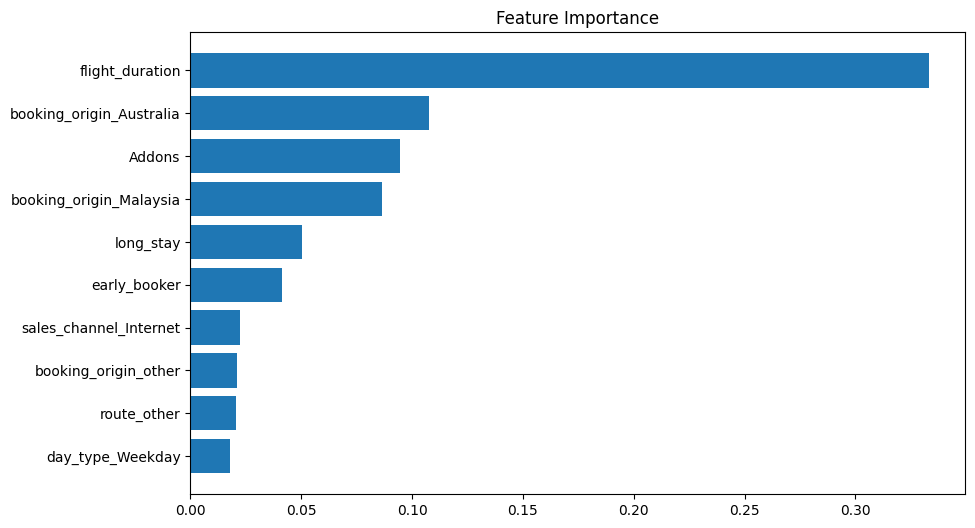

In [101]:
import matplotlib.pyplot as plt
import numpy as np

importances = pipe.named_steps["model"].feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(10), importances[indices[:10]][::-1])
plt.yticks(range(10), [features[i] for i in indices[:10]][::-1])
plt.show()
